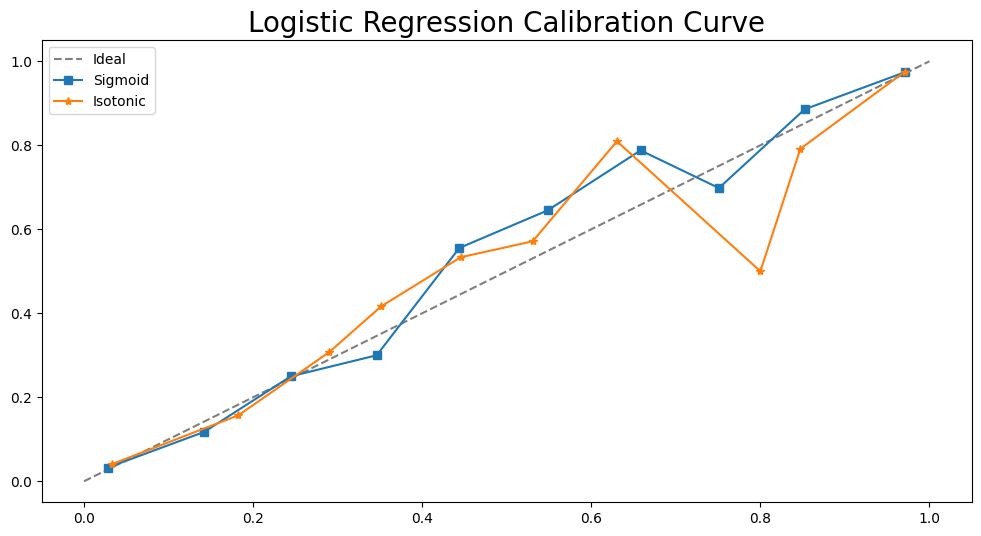

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve

X, y = make_classification(n_samples=5000, n_features=2, n_informative=2, n_redundant=0)
n_train_samples = 1000

X_train, y_train = X[:n_train_samples], y[:n_train_samples]
X_test, y_test = X[n_train_samples:], y[n_train_samples:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

calibrated_clf_sigmoid = CalibratedClassifierCV(clf, method='sigmoid', cv='prefit')
calibrated_clf_isotonic = CalibratedClassifierCV(clf, method='isotonic', cv='prefit')

calibrated_clf_sigmoid.fit(X_train, y_train)
calibrated_clf_isotonic.fit(X_train, y_train)

y_test_predict_proba_s = calibrated_clf_sigmoid.predict_proba(X_test)[:, 1]
y_test_predict_proba_i = calibrated_clf_isotonic.predict_proba(X_test)[:, 1]

fraction_of_positives_s, mean_predicted_value_s = calibration_curve(y_test, y_test_predict_proba_s, n_bins=10)
fraction_of_positives_i, mean_predicted_value_i = calibration_curve(y_test, y_test_predict_proba_i, n_bins=10)

fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.plot(mean_predicted_value_s, fraction_of_positives_s, 's-')
plt.plot(mean_predicted_value_i, fraction_of_positives_i, '*-')
plt.legend(['Ideal', 'Sigmoid', 'Isotonic'])
plt.title("Logistic Regression Calibration Curve", fontsize=20);
plt.savefig('calibration.png')